In [1]:
from torchvision import datasets, transforms
from torch.utils import data

In [2]:
train_loader = data.DataLoader(
    datasets.FashionMNIST('dataset/', train=True, download=True,
                         transform=transforms.Compose([
                             #증폭 추가
                             transforms.RandomHorizontalFlip(),
                             transforms.ToTensor(),
                             transforms.Normalize(mean=(0.5,), std=(0.5,))
                         ])
                         ),
    batch_size=32
)
                          


In [3]:
test_loader = data.DataLoader(
    datasets.FashionMNIST('dataset/', train=False, download=True,
                         transform=transforms.Compose([
                             #증폭 추가
                             transforms.RandomHorizontalFlip(),
                             transforms.ToTensor(),
                             transforms.Normalize(mean=(0.5,), std=(0.5,))
                         ])
                         ),
    batch_size=32
)
                

In [4]:
len(train_loader), len(test_loader) #배치사이즈 32여서 각 길이에 * 32 해주면 됨
# 대충 6만개 1만개해서 7만개 -> 잘 했음

(1875, 313)

In [5]:
images, labels = next(iter(train_loader))
images.shape #4개의 값 , batch_size, channel, height, width -> 넓이

torch.Size([32, 1, 28, 28])

In [6]:
labels.shape

torch.Size([32])

In [7]:
images[0].shape

torch.Size([1, 28, 28])

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
import torch
torch_image = torch.squeeze(images[0]) #1을 제거 후 28,28 로 시각화를 해보기 위해 squeeze()함수 사용
torch_image.shape

torch.Size([28, 28])

In [10]:
torch_image.numpy()

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

In [11]:
import os # kernel error 발생 시 추가
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

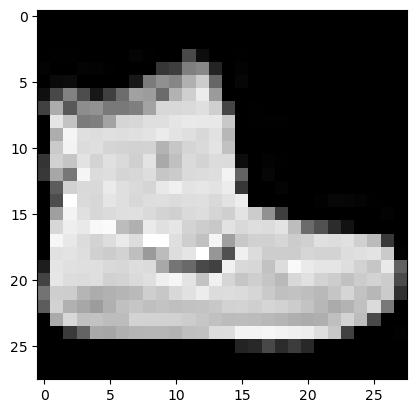

In [12]:
plt.imshow(torch_image.numpy(), 'gray')
plt.show()

In [13]:
import torch
import torch.nn as nn

layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu')) #매개변수 4개 입력채널, 출력채널, 커널 사이즈, 보폭
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [14]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [15]:
weight = weight.detach().numpy()
weight.shape

(20, 1, 5, 5)

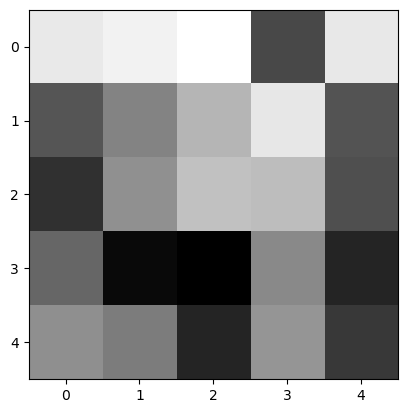

In [16]:
plt.imshow(weight[0,0,:,:],'gray') #필터 역할을 하는 컨볼루셔널 레이어

In [18]:
output_data = layer(images)
output_data = output_data.data 
output = output_data.cpu().numpy()
output.shape


(32, 20, 24, 24)

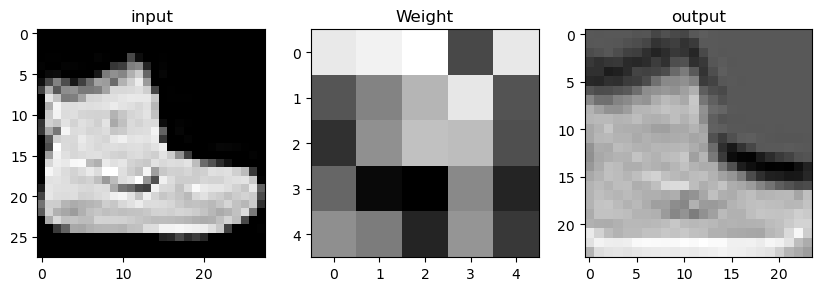

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.title('input')
plt.imshow(images[0,0,:,:], 'gray') #origin image
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:], 'gray') #filter
plt.subplot(133)
plt.title('output')
plt.imshow(output[0,0,:,:], 'gray') #filter
plt.show()

In [24]:
import torch.nn.functional as f

In [25]:
images.shape

torch.Size([32, 1, 28, 28])

In [27]:
pool = f.max_pool2d(images,2,2) #풀링할 이미지, 커널, 스트라이드 
#풀링은 N X N 커널에서 값 필터링 해서 계산 연산 줄이는거임.
pool.shape

torch.Size([32, 1, 14, 14])

In [28]:
pool_arr = pool.numpy()
pool_arr.shape

(32, 1, 14, 14)

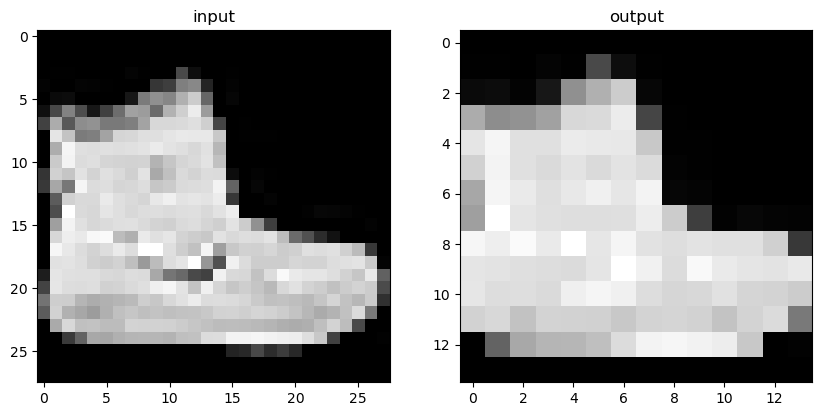

In [30]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.title("input")
plt.imshow(images[0,0,:,:],'gray')
plt.subplot(122)
plt.title("output")
plt.imshow(pool_arr[0,0,:,:],'gray')
plt.show()

In [ ]:
#CNN 모델 구조
#입력데이터 -> (합성곱 -> 풀링 -> 활성화 함수)반복 -> 평탄화 -> 전결합 레이어 -> 전결합 레이어 -> 분류 결과
#CNN 모델 구현